In [6]:
import glob
import os

current_dir = os.getcwd()
tbl_order_file = os.path.join(current_dir, 'tbl_order_*.csv')
tbl_order_files = glob.glob(tbl_order_file)

In [7]:
order_all = pd.DataFrame()
for file in tbl_order_files:
    order_tmp = pd.read_csv(file)
    print(f'{file}:{len(order_tmp)}')
    order_all = pd.concat([order_all, order_tmp], ignore_index = True)

C:\Users\manci\tbl_order_202104.csv:233262
C:\Users\manci\tbl_order_202105.csv:241142
C:\Users\manci\tbl_order_202106.csv:233302


In [9]:
import pandas as pd

m_store = pd.read_csv('C:/Users/manci/Desktop/data/PythonML-main/PythonML-main/chapter03/m_store.csv')
m_area = pd.read_csv('C:/Users/manci/Desktop/data/PythonML-main/PythonML-main/chapter03/m_area.csv')

In [10]:
order_all = order_all.loc[order_all['store_id'] != 999]

order_all = pd.merge(order_all, m_store, on = 'store_id', how = 'left')
order_all = pd.merge(order_all, m_area, on = 'area_cd', how = 'left')

In [11]:
order_all.loc[order_all['takeout_flag'] == 0, 'takeout_name'] = 'delivery'
order_all.loc[order_all['takeout_flag'] == 1, 'takeout_name'] = 'takeout'

In [12]:
order_all.loc[order_all['status'] == 0, 'status_name'] = '주문 접수'
order_all.loc[order_all['status'] == 1, 'status_name'] = '결제 완료'
order_all.loc[order_all['status'] == 2, 'status_name'] = '배달 완료'
order_all.loc[order_all['status'] == 9, 'status_name'] = '주문 취소'

In [13]:
order_all.loc[:, 'order_date'] = pd.to_datetime(order_all['order_accept_date']).dt.date

In [14]:
order_all.groupby(['store_id', 'customer_id'])['total_amount'].describe()

count          mean           std      min      25%  \
store_id customer_id                                                        
1        C00244531     14.0  33195.714286   8602.625462  18820.0  25157.5   
         C00493736      7.0  33181.428571   9225.469145  24710.0  27190.0   
         C01249550      9.0  28896.666667  10423.662984  18570.0  20640.0   
         C02241044      6.0  36538.333333  11844.077704  22520.0  25710.0   
         C02859946      9.0  32165.555556   8582.160438  18570.0  26470.0   
...                     ...           ...           ...      ...      ...   
196      C84471901     65.0  27887.538462   8096.654987   6980.0  22380.0   
         C88251581     57.0  30461.228070   9909.696923   6980.0  23280.0   
         C90878439     76.0  28634.605263   8527.747564   6980.0  21540.0   
         C97487773     62.0  30135.806452   9026.498431   6980.0  22380.0   
         C98683987     72.0  28679.861111   9114.931952   6980.0  21540.0   

                          50%      75%      max  
store_id customer_id                             
1        C00244531    36795.0  39010.0  44620.0  
         C00493736    29870.0  36155.0  51000.0  
         C01249550    26470.0  39000.0  46920.0  
         C02241044    39795.0  46837.5  46920.0  
         C02859946    35860.0  39000.0  39310.0  
...                       ...      ...      ...  
196      C84471901    26770.0  32340.0  46590.0  
         C88251581    29870.0  39000.0  46590.0  
         C90878439    26150.0  38650.0  46590.0  
         C97487773    27790.0  39000.0  46590.0  
         C98683987    26770.0  35300.0  46590.0  

[41336 rows x 8 columns]

In [16]:
summary_df = order_all.loc[order_all['status'].isin([1,2])]
store_summary_df = summary_df.groupby(['store_id'])['total_amount'].sum()

store_summary_df = pd.merge(store_summary_df, m_store, on = 'store_id', how = 'left')
print('매출 상위')
display(store_summary_df.sort_values('total_amount', ascending = False).head(10))
print('매출 하위')
display(store_summary_df.sort_values('total_amount', ascending = True).head(10))

매출 상위


,store_id,total_amount,store_name,area_cd
47,48,120384690,노해로2점,SL
190,191,118095960,사우중로점,GB
122,123,113134310,송정해변로점,BS
67,68,112799400,천호대로2점,SL
62,63,112211910,녹사평대로2점,SL
126,127,111797560,분포로점,BS
99,100,111248660,온천천로점,BS
43,44,110643570,무교로2점,SL
78,79,110076670,종로2점,SL
172,173,110034720,비아로점,GJ


매출 하위


,store_id,total_amount,store_name,area_cd
100,101,53586580,중동2로점,BS
2,3,56984250,무교로점,SL
75,76,57112800,국제금융로2점,SL
151,152,57119100,대흥로점,DJ
11,12,57884940,봉화산로점,SL
195,196,58966680,석봉로점,GB
185,186,60675020,효원로점,GN
161,162,61621230,상무번영로점,GJ
69,70,62304610,은평로2점,SL
145,146,62967010,용운동점,DJ


In [17]:
#취소 분석
cancel_df = pd.DataFrame()
cancel_cnt = order_all.loc[order_all['status'] == 9].groupby(['store_id'])['store_id'].count()

In [18]:
order_cnt = order_all.loc[order_all['status'].isin([1, 2, 9])].groupby(['store_id'])['store_id'].count()
cancel_rate = (cancel_cnt / order_cnt)*100
cancel_df['cancel_rate'] = cancel_rate

In [21]:
cancel_df.head(10)

,cancel_rate
store_id,
1,18.969885
2,18.636756
3,18.555901
4,18.160767
5,18.172100
6,19.268111
7,17.719742
8,20.218409
9,19.403394


In [22]:
cancel_df = pd.merge(cancel_df, m_store, on = 'store_id', how = 'left')
print('취소율 낮음')
display(cancel_df.sort_values('cancel_rate', ascending = True).head(10))
print('취소율 높음')
display(cancel_df.sort_values('cancel_rate', ascending = False).head(10))

취소율 낮음


,store_id,cancel_rate,store_name,area_cd
121,122,16.590164,해운대해변로점,BS
119,120,16.595404,청사포로점,BS
130,131,16.626287,둔산로점,DJ
40,41,17.073840,월계로점,SL
152,153,17.110834,내방로점,GJ
33,34,17.150396,성산동점,SL
146,147,17.290026,한남로점,DJ
19,20,17.304297,장승배기로점,SL
68,69,17.320341,올림픽로2점,SL
122,123,17.361261,송정해변로점,BS


취소율 높음


,store_id,cancel_rate,store_name,area_cd
7,8,20.218409,당산로점,SL
138,139,20.086795,한밭대로점,DJ
131,132,19.948335,대전로점,DJ
156,157,19.811321,우치로점,GJ
95,96,19.747546,구덕로점,BS
9,10,19.592697,성내로점,SL
65,66,19.592697,도봉로2점,SL
194,195,19.568966,화중로점,GB
75,76,19.525302,국제금융로2점,SL
176,177,19.483501,필문대로점,GJ


In [23]:
#취소 왜 why
def calc_delta(t):
    t1, t2 = t
    delta = t2 - t1
    return delta.total_seconds() / 60

In [24]:
order_all.loc[:, 'order_accept_datetime'] = pd.to_datetime(order_all['order_accept_date'])
order_all.loc[:, 'delivered_datetime'] = pd.to_datetime(order_all['delivered_date'])
order_all.loc[:, 'delta'] = order_all[['order_accept_datetime', 'delivered_datetime']].apply(calc_delta, axis = 1)

In [25]:
delivery_df = order_all.loc[(order_all['status'] == 2) & (order_all['store_id'].isin([8,122]))]
delivery_df.groupby(['store_id'])['delta'].mean()

store_id
8      47.560231
122    20.164304
Name: delta, dtype: float64

In [26]:
#가설 검증
temp_cancel = cancel_df.copy()
temp_delivery = order_all.loc[order_all['status'] == 2].groupby([('store_id')])['delta'].mean()

check_df = pd.merge(temp_cancel, temp_delivery, on = 'store_id', how = 'left')
check_df.head()

,store_id,cancel_rate,store_name,area_cd,delta
0,1,18.969885,삼일대로점,SL,34.378830
1,2,18.636756,세종대로점,SL,34.719848
2,3,18.555901,무교로점,SL,34.415958
3,4,18.160767,덕수궁길점,SL,34.498651
4,5,18.172100,서소문로점,SL,34.120035


In [30]:
check_df.sort_values('delta', ascending = False).head()

,store_id,cancel_rate,store_name,area_cd,delta
138,139,20.086795,한밭대로점,DJ,48.212598
131,132,19.948335,대전로점,DJ,47.943930
156,157,19.811321,우치로점,GJ,47.913215
65,66,19.592697,도봉로2점,SL,47.909249
75,76,19.525302,국제금융로2점,SL,47.688018


In [31]:
#전체매장
temp_chk = check_df[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.00000,0.65765
delta,0.65765,1.00000


In [32]:
# 주문취소 비율과 배달시간이 0.5 이상이므로 상관관계가 있다고 볼 수 있다

In [37]:
# 취소율 높은 매장
th_high = check_df['cancel_rate'].quantile(0.75)
temp_chk = check_df.loc[(check_df['cancel_rate'] >= th_high)]
temp_chk = temp_chk[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.000000,0.772029
delta,0.772029,1.000000


In [38]:
# 취소율 낮은 매장
th_low = check_df['cancel_rate'].quantile(0.25)
temp_chk = check_df.loc[(check_df['cancel_rate'] >= th_low)]
temp_chk = temp_chk[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.00000,0.61053
delta,0.61053,1.00000


In [36]:
# 주문 취소율이 높은 매장과 낮은 매출 둘다 취소율이 배달시간과 상관관계가 있다고 나옴

In [40]:
# 시각화
import seaborn as sns
import datetime

target_store = ""
min_date = datetime.date(2021, 4, 1)
max_date = datetime.date(2021, 4, 30)

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

In [69]:
import pandas as pd
from IPython.display import display, clear_output
from ipywidgets import Dropdown
from ipywidgets import SelectMultiple
from ipywidgets import IntSlider
from ipywidgets import ToggleButtons
from ipywidgets import DatePicker

In [105]:
def make_board():
    clear_output()
    display(toggle_db)
    
    # 데이터 작성
    pick_order_data = order_all.loc[
        (order_all['store_name'] == target_store) &
        (order_all['order_date'] >= min_date) &
        (order_all['order_date'] <= max_date) &
        (order_all['status'].isin([1,2]))
    ]
    pick_cancel_data = order_all.loc[
        (order_all['store_name'] == target_store) &
        (order_all['order_date'] >= min_date) &
        (order_all['order_date'] <= max_date) &
        (order_all['status'] == 9)
    ]
    pick_order_all = order_all.loc[
        (order_all['order_date'] >= min_date) &
        (order_all['order_date'] <= max_date) &
        (order_all['status'].isin([1,2]))
    ]
    pick_cancel_all = order_all.loc[
        (order_all['order_date'] >= min_date) &
        (order_all['order_date'] <= max_date) &
        (order_all['status'] == 9)
    ]
    store_o_cnt = len(pick_order_data)
    store_c_cnt = len(pick_order_data['customer_id'].unique())
    store_cancel_rate = (len(pick_cancel_data) / (len(pick_order_data) + 
                                                  len(pick_cancel_data))) * 100
    
    delivery_time = pick_order_data.loc[
        pick_order_data['status'] == 2]['delta'].mean()
    delivery_time_all = pick_order_all.loc[
        pick_order_all['status'] == 2]['delta'].mean()
    
    # 화면
    temp = pick_order_data[['order_date', 'total_amount']].copy()
    temp.loc[:, 'order_date'] = pd.to_datetime(temp['order_date'])
    temp.set_index('order_date', inplace = True)
    
    print(f"====================================================")
    
    str_out = f"  {target_store}  [대상 기간]: {min_date}~{max_date}"
    str_out = str_out + f"[데이터 건수]: {store_o_cnt} 건, " \
                        f"[이용 고객 수]: {store_c_cnt}"
    print(str_out)
    print(f"----------------------------------------------------")
    
    print(f"       일간 매출         ")
    display(temp.resample('D').sum())
    print("-----------------------------------------------------")
    
    str_out = f"[기간 매출 총액:{'{:,}'.format(temp['total_amount'].sum())} "
    str_out = str_out + f"[주문 취소 총액]: " \
                        f"{'{:,}'.format(pick_cancel_data['total_amount'].sum())}] "
    str_out = str_out + f"[주문 취소율]: {round(store_cancel_rate, 2)} % "
    print(str_out)
    str_out = f"[평균 배달 시간]: {round(delivery_time, 2)}분"
    str_out = str_out + f"[전 매장 평균 배달 시간]: " \
                        f"{round(delivery_time_all, 2)}분"
    print(str_out)
    print(f"----------------------------------------------------")
    
    # 그래프
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(temp.resample('D').sum(), ax = ax1, kde = False)
    ax1.set_title(f"매출(일 단위) 히스토그램")
    
    sns.countplot(x = 'order_date', data = pick_cancel_data, ax = ax2)
    ax2.set_title(f"주문 취소 수(일 단위)")
    
    fig, (ax3) = plt.subplots(1, 1, figsize = (20,5))
    sns.boxplot(x = 'order_date', y = 'total_amount', data = pick_order_data)
    ax3.set_title(f"주문 상황 상자 수염도")
    
    plt.show()

In [106]:
# 날짜 변경 시 처리
def change_date_min(val):
    global min_date
    min_date = val['new']
    make_board()
    
def change_date_max(val):
    global max_date
    max_date = val['new']
    make_board()

In [107]:
# 드롭다운 변경 시 처리
def change_dropdown(val):
    global target_store
    target_store = val['new']
    
    # 기간 지정 기능
    date_picker_min = DatePicker(value = min_date)
    date_picker_min.observe(change_date_min, names = 'value')
    print(f"기간")
    date_picker_max = DatePicker(value = max_date)
    date_picker_max.observe(change_date_max, names = 'value')
    display(date_picker_min, date_picker_max)

In [108]:
def order_by_area(val):
    clear_output()
    display(toggle_db)
    # 선택 지역의 매장 목록 만듦
    store_list = order_all.loc[order_all['wide_area'] == val['new']]['store_name'].unique()
    # 만든 매장 리스트로 드롭다운 만듦
    dropdown = Dropdown(options = store_list)
    dropdown.observe(change_dropdown, names = 'value')
    display(dropdown)

ToggleButtons(index=1, options=('서울', '부산', '대전', '광주', '세종', '경기'), value='부산')

  민락수변로점  [대상 기간]: 2021-04-01~2021-04-10[데이터 건수]: 342 건, [이용 고객 수]: 150
----------------------------------------------------
       일간 매출         


,total_amount
order_date,
2021-04-01,888480
2021-04-02,841860
2021-04-03,1012210
2021-04-04,1009530
2021-04-05,1015640
2021-04-06,970500
2021-04-07,1023390
2021-04-08,1100510
2021-04-09,908140


-----------------------------------------------------
[기간 매출 총액:9,782,720 [주문 취소 총액]: 2,625,780] [주문 취소율]: 20.28 % 
[평균 배달 시간]: 35.35분[전 매장 평균 배달 시간]: 34.37분
----------------------------------------------------


C:\Users\manci\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manci\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manci\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manci\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manci\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manci\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 55176 missing from c

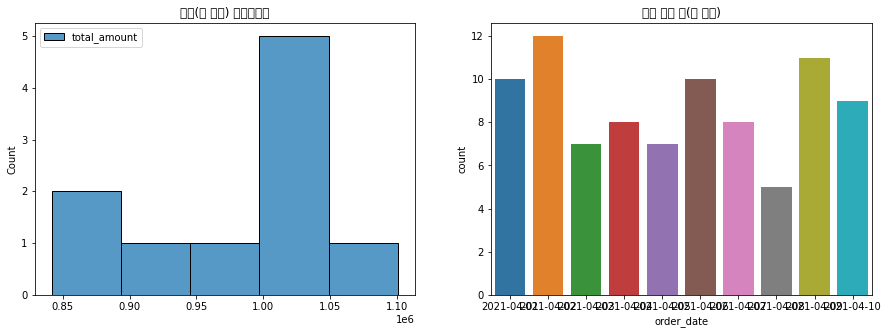

C:\Users\manci\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manci\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54889 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manci\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manci\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manci\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manci\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49345 missing from c

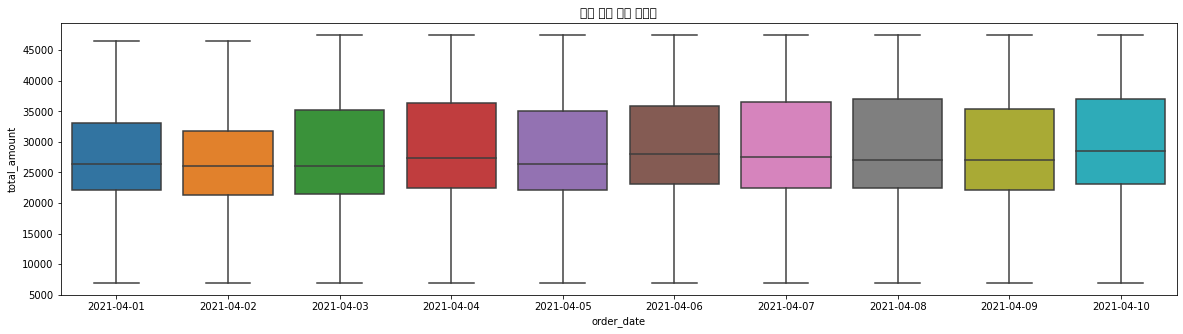

In [109]:
# 토글 버튼 표시
area_list = m_area['wide_area'].unique()
toggle_db = ToggleButtons(options = area_list)
toggle_db.observe(order_by_area, names = 'value')
display(toggle_db)

In [110]:
cal_orders_base = order_all.loc[(order_all['status'].isin([1,2]))]

# 지역 순위(배달시간 기준)
print(f"배달 시간 ============")
print(f"지역 순위 ------------")
display(pd.DataFrame(cal_orders_base.groupby(['narrow_area'])
                     ['delta'].mean().sort_values()))
print(f"지역별 TOP 5 ----------")
for area in m_area['area_cd']:
    temp = cal_orders_base.loc[cal_orders_base['area_cd'] == area]
    temp = temp.groupby(['store_id'])['delta'].mean().sort_values()
    temp = pd.merge(temp, m_store, on = 'store_id')[['store_name', 'delta']]
    display(temp.head())

배달 시간 ============
지역 순위 ------------


,delta
narrow_area,
세종,32.237884
부산,33.705678
서울,34.486309
경기북부,34.512554
경기남부,34.549012
광주,34.747533
대전,34.931595


지역별 TOP 5 ----------


,store_name,delta
0,올림픽로2점,20.259576
1,월계로점,20.292949
2,성산동점,20.330812
3,장승배기로점,20.511744
4,양재2점,33.965273


,store_name,delta
0,청사포로점,20.155399
1,해운대해변로점,20.214623
2,송정해변로점,20.326104
3,감천항로점,33.921085
4,달맞이길점,34.025184


,store_name,delta
0,둔산로점,20.042499
1,배재로점,33.896845
2,한남로점,33.905990
3,신일동로점,34.116358
4,계룡로점,34.138131


,store_name,delta
0,내방로점,20.248798
1,봉선로점,33.854262
2,예술길점,34.082332
3,광주여대길점,34.330333
4,준법로점,34.346223


,store_name,delta
0,문예회관길점,20.420270
1,금송로점,34.356755
2,조치원점,34.450122
3,세종로점,34.452113
4,절재로점,34.583509


,store_name,delta
0,영통구점,34.051593
1,기흥점,34.339094
2,성남대로점,34.703129
3,효원로점,34.807790
4,처인구점,34.864482


,store_name,delta
0,석봉로점,33.877167
1,사우중로점,34.522113
2,부흥로점,34.530631
3,화중로점,34.588424
4,방죽로점,34.591199


In [112]:
# 지역 순위(취소율)
base_df = pd.merge(check_df, m_store, on = 'area_cd')
base_df = pd.merge(base_df, m_area, on = 'area_cd')
print(f"주문 취소율 ============")
print(f"지역 순위 --------------")
display(pd.DataFrame(base_df.groupby(['narrow_area'])
                     ['cancel_rate'].mean().sort_values()))
print(f"지역별 TOP 5 ------------")
for area in m_area['area_cd']:
    temp = check_df.loc[check_df['area_cd'] == area]
    temp = temp.groupby(['store_id'])['cancel_rate'].mean().sort_values()
    temp = pd.merge(temp, m_store, on = 'store_id')[['store_name', 'cancel_rate']]
    display(temp.head())

주문 취소율 ============
지역 순위 --------------


,cancel_rate
narrow_area,
부산,18.231331
세종,18.268806
대전,18.329304
경기남부,18.388690
광주,18.449330
서울,18.458221
경기북부,18.572727


지역별 TOP 5 ------------


,store_name,cancel_rate
0,월계로점,17.073840
1,성산동점,17.150396
2,장승배기로점,17.304297
3,올림픽로2점,17.320341
4,도봉로점,17.425432


,store_name,cancel_rate
0,해운대해변로점,16.590164
1,청사포로점,16.595404
2,송정해변로점,17.361261
3,중앙대로점,17.451169
4,마린시티1로점,17.604618


,store_name,cancel_rate
0,둔산로점,16.626287
1,한남로점,17.290026
2,복수서로점,17.418874
3,신갈마로점,17.547387
4,용운동점,17.697063


,store_name,cancel_rate
0,내방로점,17.110834
1,장동로점,17.485598
2,용아로점,17.560489
3,효덕로점,17.786864
4,상무대로점,17.837674


,store_name,cancel_rate
0,문예회관길점,17.410714
1,조치원점,17.446198
2,금송로점,18.335942
3,세종로점,18.531268
4,절재로점,18.852259


,store_name,cancel_rate
0,효원로점,17.625000
1,영통구점,17.753510
2,처인구점,18.737673
3,기흥점,18.827930
4,성남대로점,18.999339


,store_name,cancel_rate
0,사우중로점,17.853436
1,일산동구점,18.023084
2,부흥로점,18.301793
3,방죽로점,18.838604
4,석봉로점,18.850482
